In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.decomposition import KernelPCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
def apply_kernel_pca(X, n_components=2, gamma=15):
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)
    
    return X_kpca

In [3]:
dataset1 = pd.read_csv("CKD.csv",index_col=None)

In [4]:
df2 = dataset1

In [5]:
df2 = pd.get_dummies(df2,drop_first=True)

In [6]:
def evaluate_classifiers(X, y):
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM Linear': SVC(kernel='linear'),
        'SVM RBF': SVC(kernel='rbf'),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy_results = []
    for name, model in classifiers.items():
        model.fit(X_train, y_train)
        #accuracy = accuracy_score(y_test, model.predict(X_test))
        #accuracy_results.append({'Classifier': name, 'Accuracy': accuracy})
        print(f"\n🔹 {name}")
        y_pred = model.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

    accuracy_df = pd.DataFrame(accuracy_results)
    return accuracy_df, classifiers

       


In [7]:
def plot_kpca_2d(X_kpca, y):
    plt.figure(figsize=(7, 6))
    plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], c='red', label='CKD')
    plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], c='blue', label='Not CKD')
    plt.xlabel('KPCA Component 1')
    plt.ylabel('KPCA Component 2')
    plt.title('2D KPCA Projection')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
def run_Kpca_classification(X, y,show_plot=True):
    
    X_kpca = apply_kernel_pca(X)
    #pca_values = X_pca.explained_variance_ratio_.round(4)
    accuracy_df = evaluate_classifiers(X_kpca, y)
    if show_plot:
        plot_kpca_2d(X_kpca, y)
        
    return accuracy_df

In [9]:

X = df2.drop('classification_yes',1)
y = df2['classification_yes']



🔹 Logistic Regression
Accuracy: 0.5125
Confusion Matrix:
 [[ 0 39]
 [ 0 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.51      1.00      0.68        41

    accuracy                           0.51        80
   macro avg       0.26      0.50      0.34        80
weighted avg       0.26      0.51      0.35        80


🔹 SVM Linear
Accuracy: 0.5125
Confusion Matrix:
 [[ 0 39]
 [ 0 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.51      1.00      0.68        41

    accuracy                           0.51        80
   macro avg       0.26      0.50      0.34        80
weighted avg       0.26      0.51      0.35        80


🔹 SVM RBF
Accuracy: 0.525
Confusion Matrix:
 [[ 1 38]
 [ 0 41]]
Classification Report:
               precision    recall  f1-score   support

       

C:\Anaconda\envs\mlai\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\mlai\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\mlai\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\mlai\lib\site-packages\sklearn\metrics\_classif

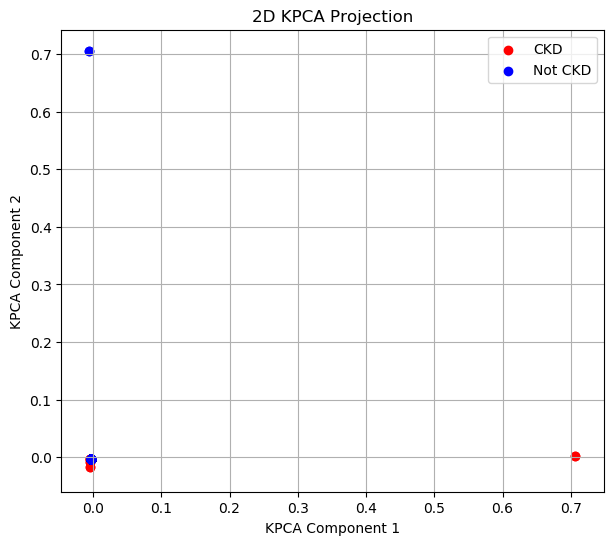


Classifier Accuracy on PCA Data:
(Empty DataFrame
Columns: []
Index: [], {'Logistic Regression': LogisticRegression(max_iter=1000), 'SVM Linear': SVC(kernel='linear'), 'SVM RBF': SVC(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier()})


In [10]:
# X = feature matrix, y = labels
accuracy_df = run_Kpca_classification(X, y)

print("\nClassifier Accuracy on PCA Data:")
print(accuracy_df)